In [1]:
## IMPORTANT !

# In the first order need to set the number of CPU 
# for calculation before launching (depends on computer's number of cores)
n_jobs= 50
#libraries
import pandas as pd
import numpy as np
import os
import sys
import shutil
import glob
import joblib
import warnings
from datetime import date, datetime

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
import scipy.stats as st

from nilearn import image as nli
from nilearn import plotting

#from mne.viz import plot_connectivity_circle
#from mne_connectivity.viz import plot_connectivity_circle

import copy

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

##### load path var

In [2]:
Rcomcor_path = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_REST_acomcor/'
Rfix_path = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_REST_fix/'
test5_path = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_5/'
test4_path = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_4/'

path_out = test5_path


##### Load data (correlation index)

In [4]:
dct_cor = {}

for lbl, path in zip(['rest_comcor_train', 'rest_fix_train', 'rest_comcor_test', 'rest_fix_test'],
                     [Rcomcor_path, Rfix_path, test5_path, test4_path]):
    
    df_ = pd.read_csv((glob.glob(path+'*'+'MAE_YA.csv')[0]), index_col=0)
    df_ = df_.loc[[i for i in df_.index if 'rest' in i],:]
    if 'comcor' in lbl:
        df_.index = [i+'_aCompCor' for i in df_.index]
    if 'fix' in lbl:
        df_.index = [i+'_ica-fix' for i in df_.index]
    
    dct_cor[lbl] = df_



In [5]:
labels = ['Elastic Net, aCompCor',
            'Elastic Net, ICA-FIX',
            'RF, aCompCor',
            'RF, ICA-FIX',
            'SVR, aCompCor',
            'SVR, ICA-FIX',
            'XGB, aCompCor',
            'XGB, ICA-FIX']

##### Plot train predictability

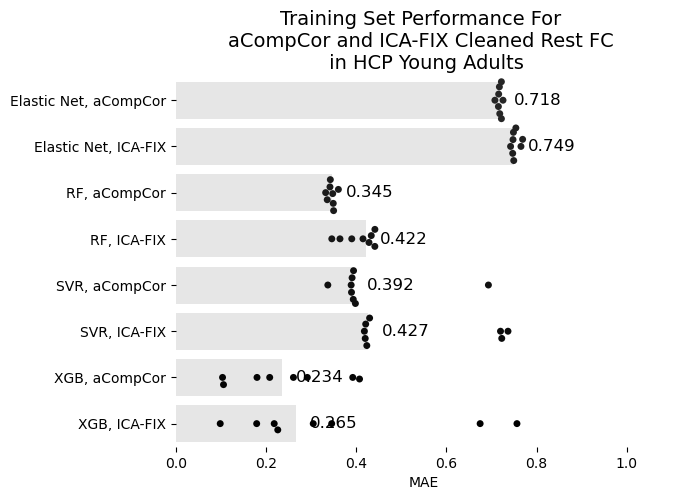

In [6]:
warnings.simplefilter("ignore")

data  = pd.concat([dct_cor['rest_comcor_train'], dct_cor['rest_fix_train']], axis=0).sort_index().T

ax = sns.barplot(data=data, estimator='median', errorbar=None, orient="h", color='0.9')
ax = sns.swarmplot(data=data, palette='dark:black', orient="h")

ax.bar_label(ax.containers[0], fontsize=12, fmt='%.3f', padding=10);

sns.despine(left=True, bottom=True, right=True)

plt.xlim((0,1.1))
plt.xlabel('MAE')
ax.set_yticklabels(labels)
plt.title('Training Set Performance For \naCompCor and ICA-FIX Cleaned Rest FC \n in HCP Young Adults', fontsize=14)

plt.show()

##### Plot test predictability

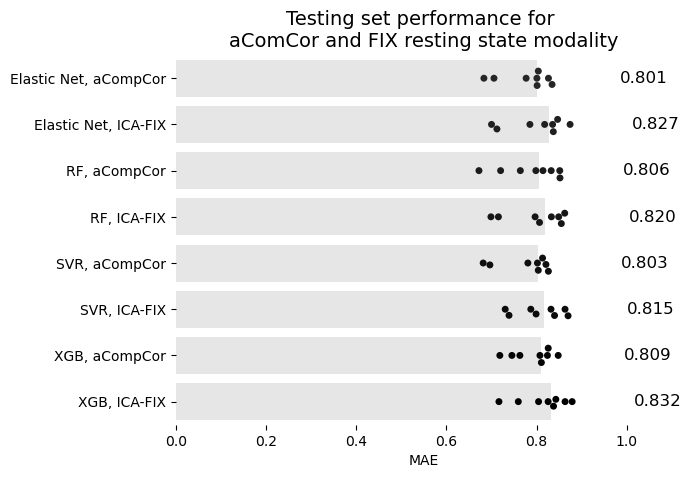

In [7]:
warnings.simplefilter("ignore")

data  = pd.concat([dct_cor['rest_comcor_test'], dct_cor['rest_fix_test']], axis=0).sort_index().T

ax = sns.barplot(data=data, estimator='median', errorbar=None, orient="h", color='0.9')
ax = sns.swarmplot(data=data, palette='dark:black', orient="h")

ax.bar_label(ax.containers[0], fontsize=12, fmt='%.3f', padding=60);

sns.despine(left=True, bottom=True, right=True)

plt.xlim((0,1.1))
plt.xlabel('MAE')
ax.set_yticklabels(labels)
plt.title('Testing set performance for \naComCor and FIX resting state modality', fontsize=14)

plt.show()